# CLUSTERING

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
df_clus = df.drop(columns=['RefId',
        'PurchDate',
        'IsBadBuy',
        'Auction',
        'Make',
        'Model',
        'Trim',
        'WheelTypeID',
        'WheelType',
        'Nationality',
        'Size',
        'Color',
        'Transmission',
        'PRIMEUNIT',
        'AUCGUART',
        'BYRNO',
        'VNST',
        'TopThreeAmericanName',
        'SubModel',
        'VehYear',
        'VNZIP1',
        'VehicleAge',
        'IsOnlineSale',
        'Region',
        'IsBase'])
df_clus.dropna(inplace=True)
len(df_clus)
df_clus.head()

,VehOdo,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,VehBCost,WarrantyCost
0,61184,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,6100.0,533
1,92383,5480.0,6461.0,6418.0,7478.0,5480.0,6461.0,6418.0,7478.0,4000.0,1630
2,45965,8067.0,8580.0,11073.0,11652.0,7497.0,8102.0,10721.0,11350.0,7500.0,693
3,80169,4817.0,6658.0,5702.0,7691.0,4817.0,6658.0,5702.0,7691.0,4725.0,1633
4,77372,5430.0,6633.0,6364.0,7664.0,5370.0,6811.0,6300.0,7856.0,5670.0,1623


## K-Means with Z-Score

In [38]:
scaler = StandardScaler()
z_df_clus = scaler.fit_transform(df_clus.values)

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans.fit(z_df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

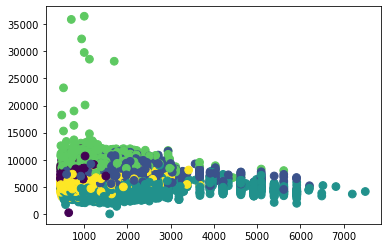

In [41]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehBCost'], 
            c=kmeans.labels_, s=60)

## K-Means with MinMax

In [42]:
scaler = MinMaxScaler()
minmax_df_clus = scaler.fit_transform(df_clus.values)

In [43]:
kmeans_2 = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans_2.fit(minmax_df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

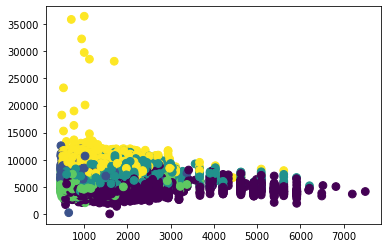

In [44]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehBCost'], 
            c=kmeans_2.labels_, s=60)

## DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(x_)

plt.scatter(df_['WarrantyCost'], df_['VehBCost'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major')
plt.show()

## Hierarchical Clustering

In [45]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [46]:
df_clus.columns

Index(['VehOdo', 'AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP',
       'CRCP', 'VehBCost', 'WarrantyCost'],
      dtype='object')

Eliminate alcune colonne + ridotto il dataset a 1000 righe

In [47]:
df_h = df_clus[['WarrantyCost','VehBCost','VehOdo']]
df_h = df_h[0:5000]

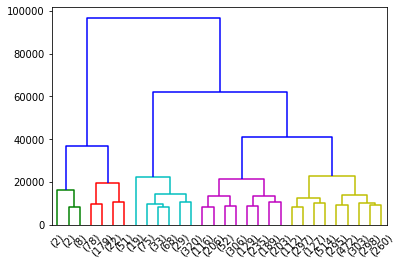

In [53]:
data_dist = pdist(df_h, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=25000, truncate_mode='lastp')